In [91]:
#ND_verse
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [92]:
# Dataset Loading krna
dynamic_pricing = pd.read_csv('dynamic_pricing_data.csv')

In [93]:
dynamic_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     1000 non-null   object 
 1   product        1000 non-null   object 
 2   category       1000 non-null   object 
 3   days_left      1000 non-null   int64  
 4   stock          1000 non-null   int64  
 5   demand_score   1000 non-null   int64  
 6   weekday        1000 non-null   object 
 7   season         1000 non-null   object 
 8   current_price  1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [94]:
dataset=pd.DataFrame(dynamic_pricing)

In [95]:
dataset

,product_id,product,category,days_left,stock,demand_score,weekday,season,current_price
0,P007,Eggs,Dairy,1,106,60,Tuesday,Summer,16.15
1,P031,Cough Syrup,Health,6,183,81,Thursday,Winter,88.14
2,P023,Baked Beans,Canned,1,47,65,Friday,Rainy,68.67
3,P012,Apple,Fruit,3,169,44,Friday,Winter,55.59
4,P030,Moisturizer,Health,5,51,61,Saturday,Summer,153.31
...,...,...,...,...,...,...,...,...,...
995,P023,Baked Beans,Canned,2,126,96,Friday,Summer,71.60
996,P003,Yogurt,Dairy,6,11,76,Thursday,Winter,52.75
997,P009,Spinach,Produce,10,77,30,Friday,Summer,5.90
998,P002,Bread,Bakery,10,49,53,Sunday,Summer,25.50


In [96]:
# check krleta hu null values to nahi hai kahi, 
dataset.isnull().sum()

product_id       0
product          0
category         0
days_left        0
stock            0
demand_score     0
weekday          0
season           0
current_price    0
dtype: int64

In [97]:
dataset.describe()

,days_left,stock,demand_score,current_price
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.460000,104.701000,59.950000,63.917380
std,2.918719,55.475194,23.118174,51.495393
min,1.000000,10.000000,20.000000,5.000000
25%,3.000000,57.000000,40.000000,28.827500
50%,5.000000,106.000000,61.000000,47.275000
75%,8.000000,154.000000,80.000000,83.777500
max,10.000000,200.000000,100.000000,262.520000


In [98]:
dataset.head()

,product_id,product,category,days_left,stock,demand_score,weekday,season,current_price
0,P007,Eggs,Dairy,1,106,60,Tuesday,Summer,16.15
1,P031,Cough Syrup,Health,6,183,81,Thursday,Winter,88.14
2,P023,Baked Beans,Canned,1,47,65,Friday,Rainy,68.67
3,P012,Apple,Fruit,3,169,44,Friday,Winter,55.59
4,P030,Moisturizer,Health,5,51,61,Saturday,Summer,153.31


EXPLORATORY DATA ANALYSIS

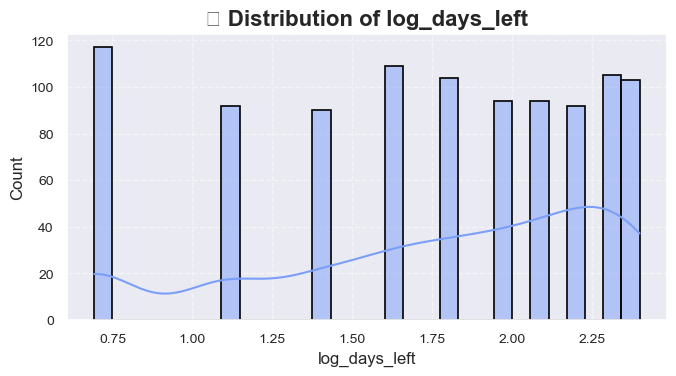

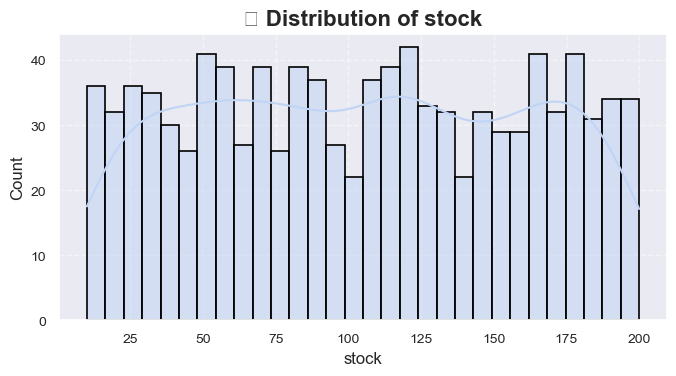

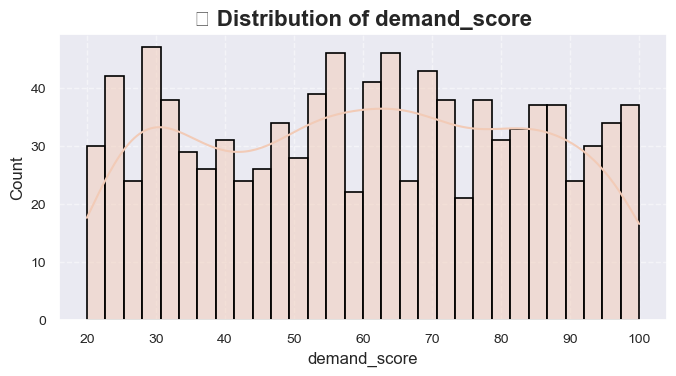

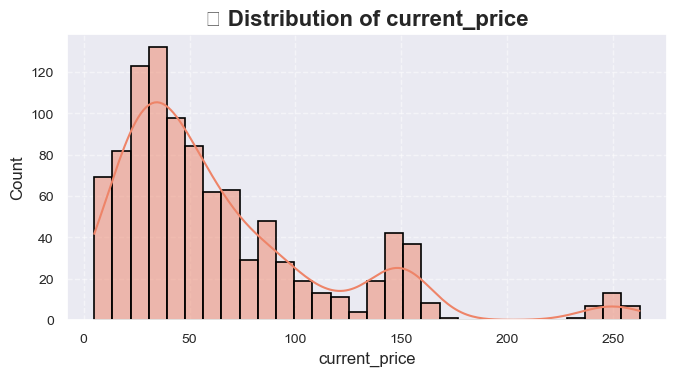

In [99]:
# 1. Feature Dsitribution
# Feature Engineering - Log Transformation
dataset['log_days_left'] = np.log1p(dataset['days_left'])

numerical_cols = ['log_days_left', 'stock', 'demand_score', 'current_price']

sns.set_theme(style="darkgrid", palette="pastel", font_scale=1.2)
colors = sns.color_palette("coolwarm", len(numerical_cols))

# Plotting each numerical feature's distribution
for i, col in enumerate(numerical_cols):
    plt.figure(figsize=(7, 4))
    sns.histplot(dataset[col], kde=True, bins=30, color=colors[i], edgecolor='black', linewidth=1.2)
    plt.title(f'📊 Distribution of {col}', fontsize=16, weight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


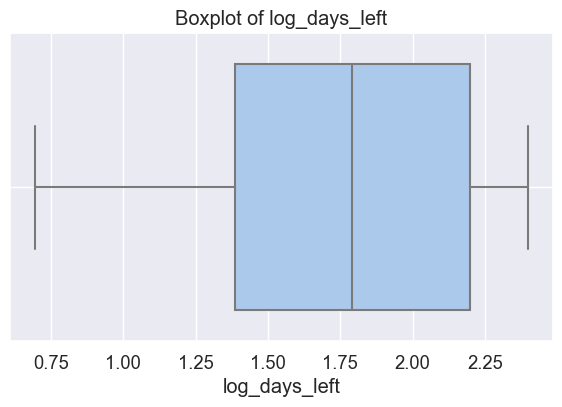

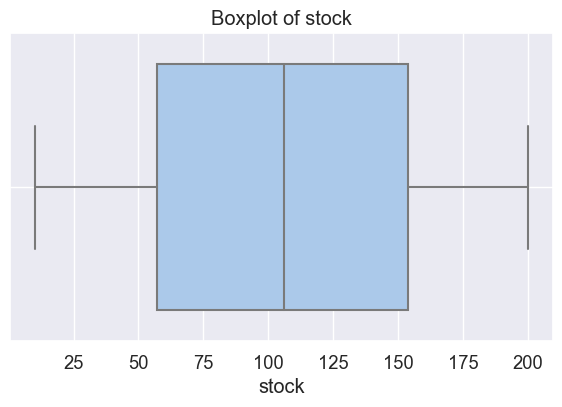

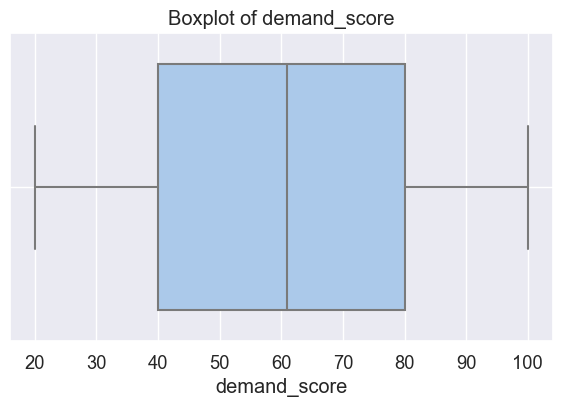

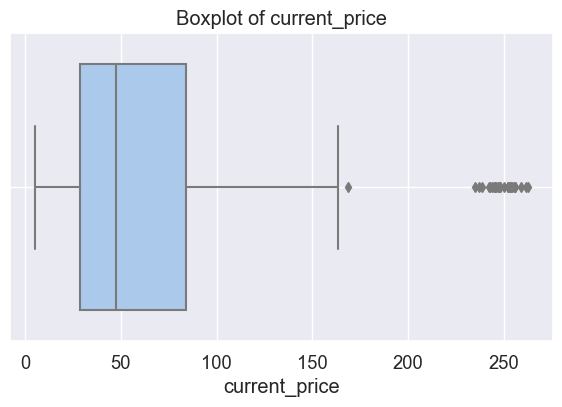

In [100]:
# 2. Box Plot
for col in numerical_cols:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()


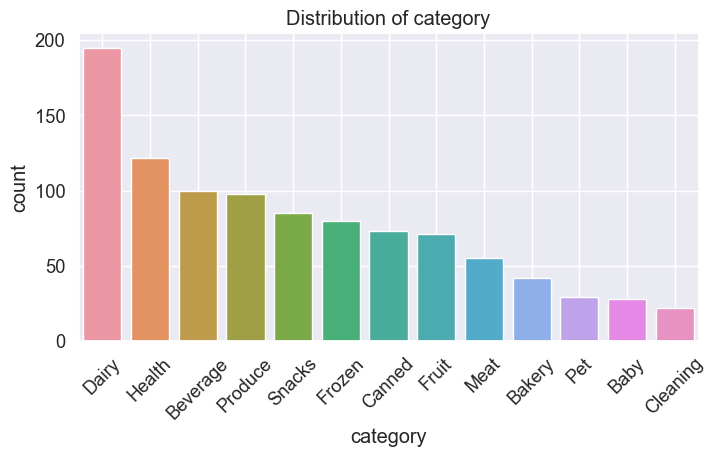

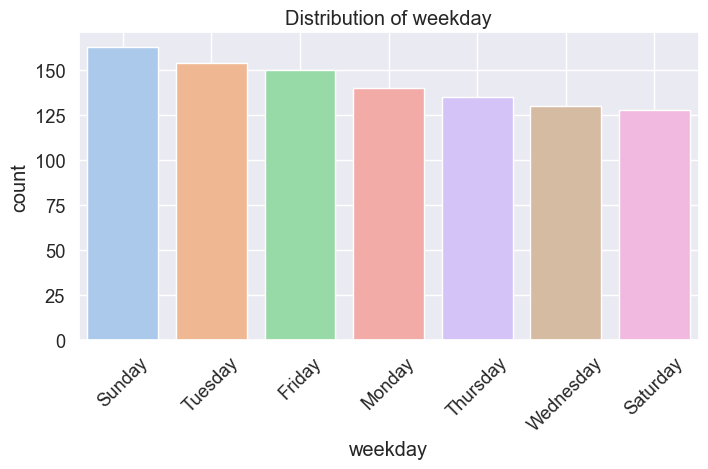

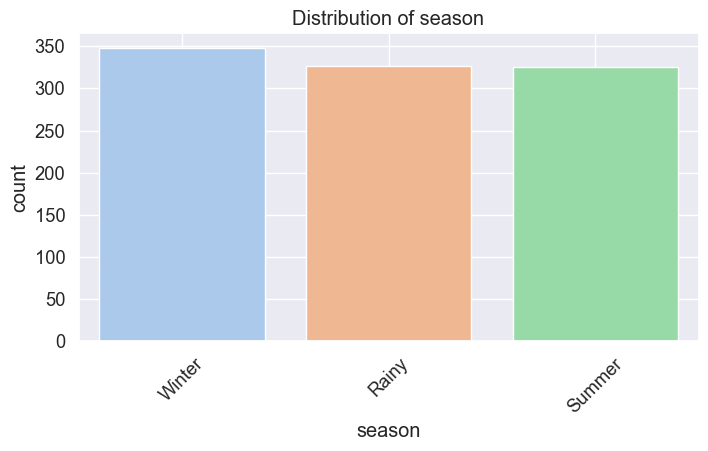

In [101]:
# 3. Distribution
categorical_cols = ['category', 'weekday', 'season']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=dataset, x=col, order=dataset[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


In [102]:
# 4. Corellation Feature
dataset.corr()

,days_left,stock,demand_score,current_price,log_days_left
days_left,1.000000,0.025357,-0.034640,-0.081417,0.971845
stock,0.025357,1.000000,0.042584,-0.074378,0.022714
demand_score,-0.034640,0.042584,1.000000,0.136534,-0.029843
current_price,-0.081417,-0.074378,0.136534,1.000000,-0.074630
log_days_left,0.971845,0.022714,-0.029843,-0.074630,1.000000


In [103]:
plt.figure(figsize =(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: >

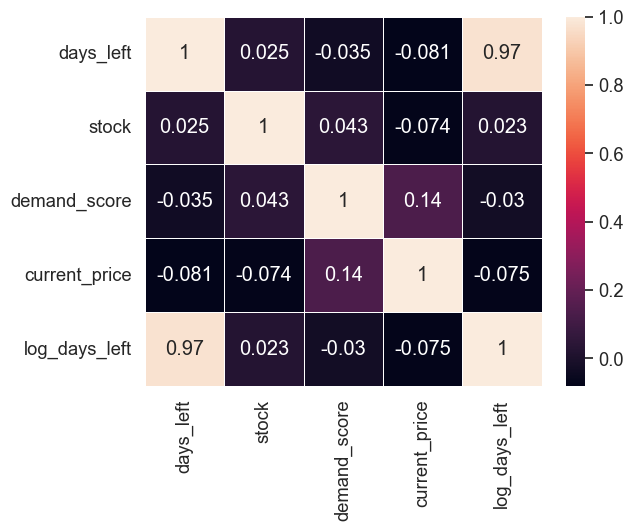

In [104]:
sns.heatmap(dataset.corr(), annot = True, linewidth = 0.5)

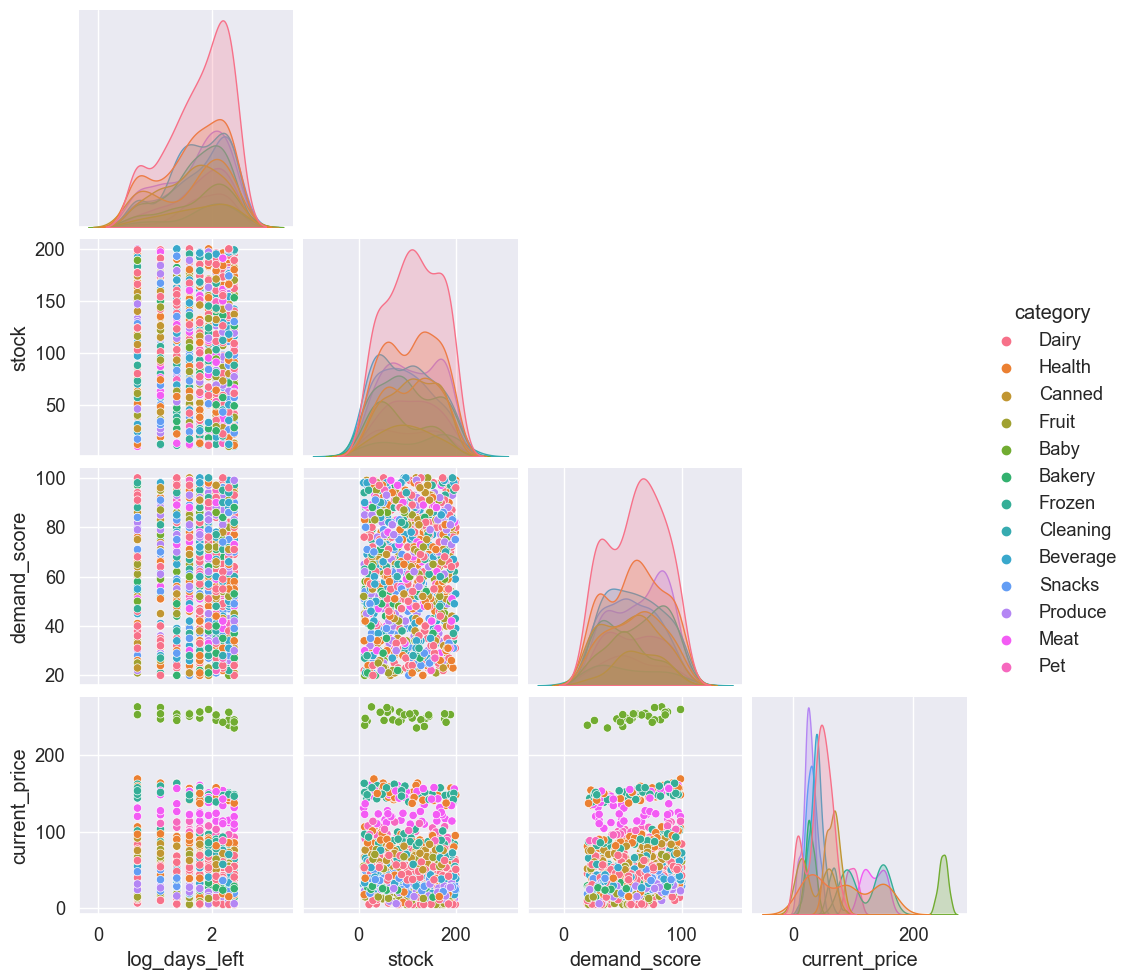

In [105]:
# 5. PairPlot
sns.pairplot(dataset[numerical_cols + ['category']], hue='category', diag_kind="kde", corner=True)

In [106]:
dataset.head()

,product_id,product,category,days_left,stock,demand_score,weekday,season,current_price,log_days_left
0,P007,Eggs,Dairy,1,106,60,Tuesday,Summer,16.15,0.693147
1,P031,Cough Syrup,Health,6,183,81,Thursday,Winter,88.14,1.945910
2,P023,Baked Beans,Canned,1,47,65,Friday,Rainy,68.67,0.693147
3,P012,Apple,Fruit,3,169,44,Friday,Winter,55.59,1.386294
4,P030,Moisturizer,Health,5,51,61,Saturday,Summer,153.31,1.791759


In [107]:
# Spliting the dataset
X = dataset.drop(columns=['product_id', 'product', 'current_price'])
Y= dataset['current_price']

In [108]:
X

,category,days_left,stock,demand_score,weekday,season,log_days_left
0,Dairy,1,106,60,Tuesday,Summer,0.693147
1,Health,6,183,81,Thursday,Winter,1.945910
2,Canned,1,47,65,Friday,Rainy,0.693147
3,Fruit,3,169,44,Friday,Winter,1.386294
4,Health,5,51,61,Saturday,Summer,1.791759
...,...,...,...,...,...,...,...
995,Canned,2,126,96,Friday,Summer,1.098612
996,Dairy,6,11,76,Thursday,Winter,1.945910
997,Produce,10,77,30,Friday,Summer,2.397895
998,Bakery,10,49,53,Sunday,Summer,2.397895


In [109]:
Y

0       16.15
1       88.14
2       68.67
3       55.59
4      153.31
        ...  
995     71.60
996     52.75
997      5.90
998     25.50
999     62.23
Name: current_price, Length: 1000, dtype: float64

In [110]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [111]:
# Building the pre-processor
categorical_cols = ['category', 'season', 'weekday']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

In [112]:
# Transformed Dataset After preprocessing
X_transformed = preprocessor.fit_transform(dataset)

# Convert it into a DataFrame for easier viewing
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
other_cols = [col for col in dataset.columns if col not in categorical_cols]
final_feature_names = list(encoded_feature_names) + other_cols

X_df = pd.DataFrame(X_transformed, columns=final_feature_names)


In [113]:
X_df.head()

,category_Bakery,category_Beverage,category_Canned,category_Cleaning,category_Dairy,category_Frozen,category_Fruit,category_Health,category_Meat,category_Pet,...,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,product_id,product,days_left,stock,demand_score,current_price,log_days_left
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,P007,Eggs,1,106,60,16.15,0.693147
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,P031,Cough Syrup,6,183,81,88.14,1.94591
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,P023,Baked Beans,1,47,65,68.67,0.693147
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,P012,Apple,3,169,44,55.59,1.386294
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,P030,Moisturizer,5,51,61,153.31,1.791759


In [114]:
# Dropping the independent features
X_final = X_df.drop(columns=['product_id', 'product', 'current_price'])  # -> ye sare input features hai
y = X_df['current_price']  # - ye hai target

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 411.4216550467357


In [117]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("(Mean Absolute Error) MAE:", mae)
print("R² Score:", r2)

(Mean Absolute Error) MAE: 13.887745702297057
R² Score: 0.8255035478792767


MAE ≈ 13.8, R² ≈ 0.82 is a solid Score which stats that the model has been trained perfectly

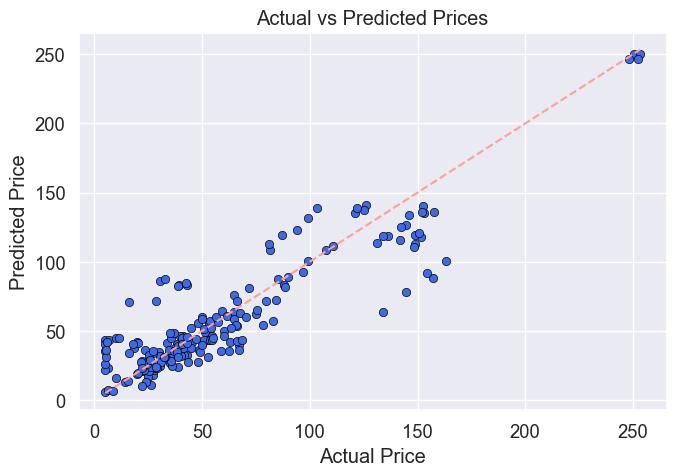

In [118]:
# Graphical Visualisation oF L.REG. Model

plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Apna best Fit Line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

See in the graph , the points are clustered closely to the best fine line depicting high accuracy of Model

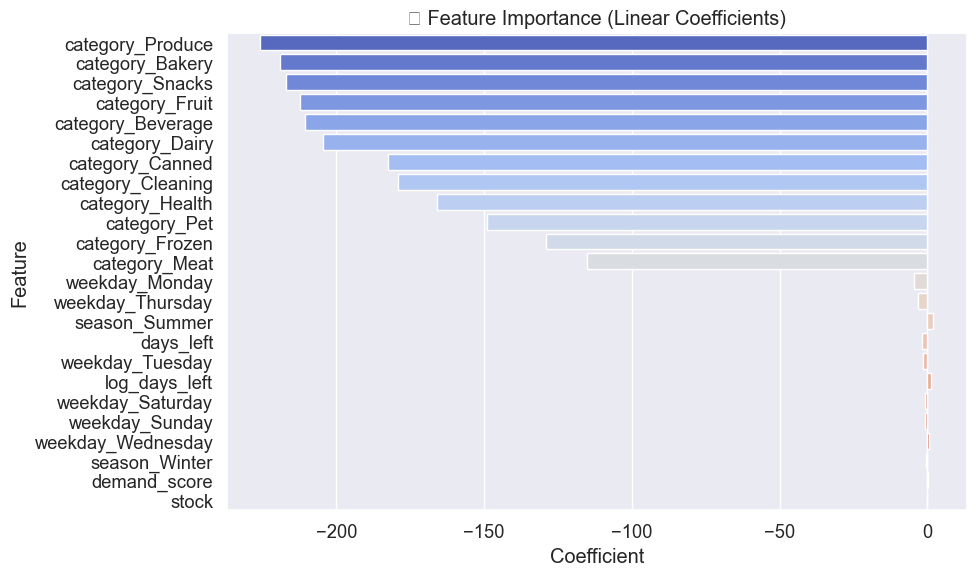

In [119]:
encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
numeric_features = [col for col in X.columns if col not in categorical_cols]
all_feature_names = list(encoded_columns) + numeric_features

# Now it's safe to map coefficients
coefs = model.coef_

coef_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefs
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title("📈 Feature Importance (Linear Coefficients)")
plt.tight_layout()
plt.show()


In [120]:
# Model Evaluation & Validation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Columns
categorical_cols = ['category', 'season', 'weekday']
numerical_cols = ['days_left', 'stock', 'demand_score']

# ColumnTransformer
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
], remainder='passthrough')

# Create a pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

# Now safely apply cross_val_score
scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -scores.mean())


Cross-validated MSE: 528.1849897793667


XGBoost REGRESSOR MODEL

In [121]:
pip install xgboost scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [122]:
# Re-import if needed
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

categorical_cols = ['category', 'season', 'weekday']


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)


xgb_pipeline = make_pipeline(
    preprocessor,
    XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
)

features = ['category', 'season', 'weekday', 'days_left', 'stock', 'demand_score']
target = 'current_price'

X = dataset[features]
y = dataset[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


xgb_pipeline.fit(X_train, y_train)

# Step 7: Evaluate
preds = xgb_pipeline.predict(X_test)
print("✅ MSE:", mean_squared_error(y_test, preds))
print("✅ R² Score:", r2_score(y_test, preds))


✅ MSE: 922.046015620284
✅ R² Score: 0.6089322075195295


In [123]:
# Since XGBoost Model isnt performing that great we would do hyperparametertuning of that model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'xgbregressor__n_estimators': [100, 200],
    'xgbregressor__max_depth': [3, 5, 7],
    'xgbregressor__learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(xgb_pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)


Best Params: {'xgbregressor__learning_rate': 0.2, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 200}


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

#Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Model
xgb_model = XGBRegressor(
    learning_rate=0.2,
    max_depth=3,
    n_estimators=200,
    random_state=42
)

# pipelining 
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", xgb_model)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# pipeline Fitting
pipeline.fit(X_train, y_train)

# Predictions adn results
preds = pipeline.predict(X_test)

mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f" MSE: {mse:.2f}")
print(f" MAE: {mae:.2f}")
print(f" R² Score: {r2:.4f}")


📉 MSE: 490.76
📉 MAE: 15.62
📈 R² Score: 0.7919


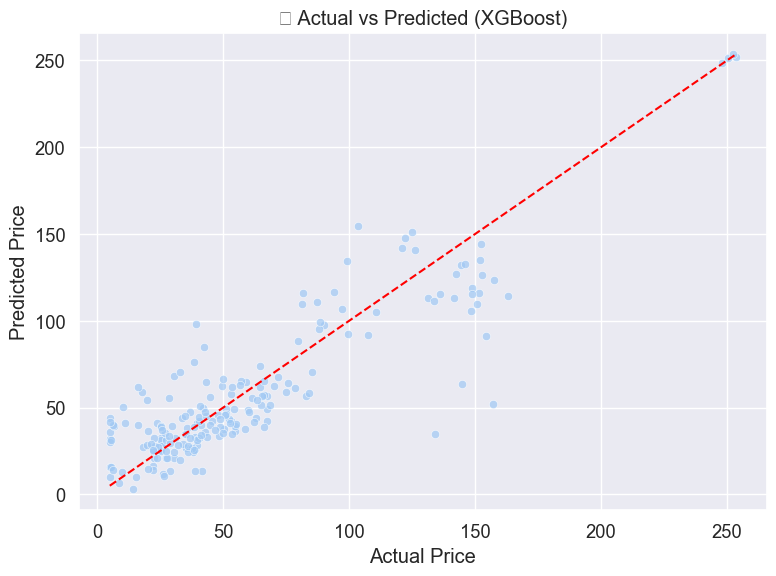

In [127]:
# Visualize Model Perfromance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=preds, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("📈 Actual vs Predicted (XGBoost)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.tight_layout()
plt.show()


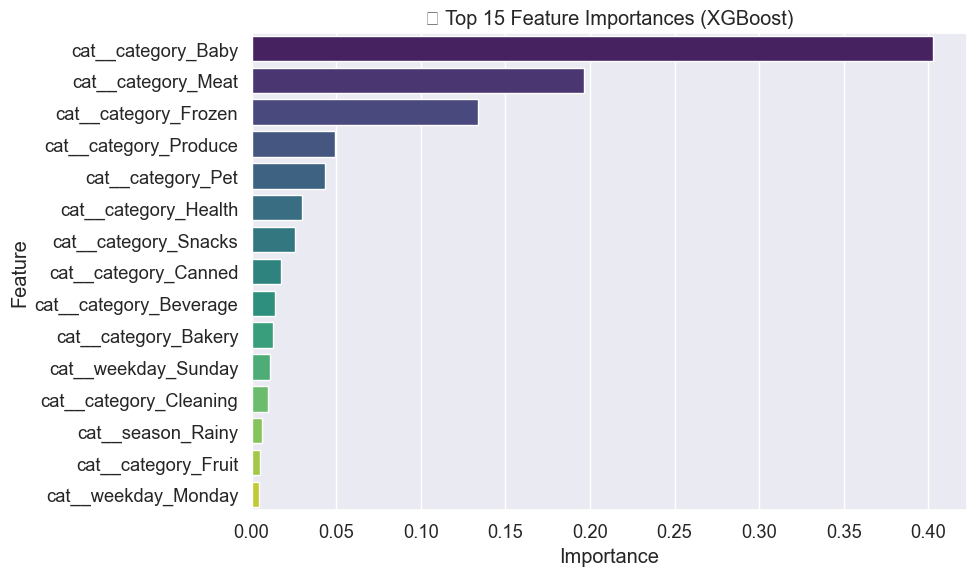

In [128]:
# Feature Importance of Model
import numpy as np


feature_names = pipeline.named_steps["preprocessor"].get_feature_names_out()
importances = pipeline.named_steps["model"].feature_importances_


feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title("🔍 Top 15 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()


In [132]:
X_encoded = pd.get_dummies(X, drop_first=True)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [133]:
# Saving and Loading the Model for backend
from xgboost import XGBRegressor
import joblib

# Fitting the model
xgb_best = XGBRegressor(
    learning_rate=0.2,
    max_depth=3,
    n_estimators=200,
    random_state=42
)

xgb_best.fit(X_train, y_train)  

# Saving trained model
joblib.dump(xgb_best, 'xgb_model.pkl')

# Loading the model
xgb_loaded = joblib.load('xgb_model.pkl')

# Now it can be used it to predict
preds = xgb_loaded.predict(X_test)

In [134]:
import json
with open('model_features.json', 'w') as f:
    json.dump(list(X_encoded.columns), f)


In [135]:
model = joblib.load('xgb_model.pkl')
print(model)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
